# Pandas 基礎

## 使用資料集:Kaggle開放資料--學生表現

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
original=pd.read_csv('./StudentsPerformance.csv')

In [75]:
original.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [76]:
print('資料的前五行為:\n',original.head())
print('資料的空值數量為:\n',original.isnull().sum())
print('資料的形狀為:',original.shape)
print('資料的型態為:\n',original.dtypes)

資料的前五行為:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
資料的空值數量為:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test p

In [77]:
print('資料gender欄位的前十個為:\n',original['gender'][:10])

資料gender欄位的前十個為:
 0    female
1    female
2    female
3      male
4      male
5    female
6    female
7      male
8      male
9    female
Name: gender, dtype: object


In [78]:
original.set_index('gender').head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75


In [79]:
print(original.loc[:10,'lunch'])
print(original.iloc[:10,3])

0         standard
1         standard
2         standard
3     free/reduced
4         standard
5         standard
6         standard
7     free/reduced
8     free/reduced
9     free/reduced
10        standard
Name: lunch, dtype: object
0        standard
1        standard
2        standard
3    free/reduced
4        standard
5        standard
6        standard
7    free/reduced
8    free/reduced
9    free/reduced
Name: lunch, dtype: object


In [80]:
print(original.loc[original.index==0,'lunch'])
print(original.loc[:10,original.columns=='gender'])

0    standard
Name: lunch, dtype: object
    gender
0   female
1   female
2   female
3     male
4     male
5   female
6   female
7     male
8     male
9   female
10    male


In [81]:
print(original.iloc[original.index==0,3])
print(original.iloc[:10,original.columns=='gender'])

0    standard
Name: lunch, dtype: object
   gender
0  female
1  female
2  female
3    male
4    male
5  female
6  female
7    male
8    male
9  female


In [82]:
print(original.loc[0:11:2,['lunch','gender']])

           lunch  gender
0       standard  female
2       standard  female
4       standard    male
6       standard  female
8   free/reduced    male
10      standard    male


In [83]:
print(original.iloc[0:11:2,[3,0]])

           lunch  gender
0       standard  female
2       standard  female
4       standard    male
6       standard  female
8   free/reduced    male
10      standard    male


In [84]:
gendergroup=original[['gender','math score']].groupby(by='gender')
print('男女數學成績加總為:\n',gendergroup.sum())
print('男女個數為:\n',gendergroup.count())

男女數學成績加總為:
         math score
gender            
female       32962
male         33127
男女個數為:
         math score
gender            
female         518
male           482


In [85]:
genderPivot=pd.pivot_table(original,index='gender',columns='lunch',values='math score',aggfunc=np.mean)
print('使用性別作為索引,午餐分類為行,值為數學成績的樞紐分析表為:\n',genderPivot)


使用性別作為索引,午餐分類為行,值為數學成績的樞紐分析表為:
 lunch   free/reduced   standard
gender                         
female     55.814815  68.124620
male       62.457831  72.022152


In [86]:
groupPivot=pd.pivot_table(original,index=r'race/ethnicity',columns='gender',values='reading score',aggfunc=np.mean)
print('使用組別作為索引,行為性別,值為閱讀成績的樞紐分析表為:\n',groupPivot)

使用組別作為索引,行為性別,值為閱讀成績的樞紐分析表為:
 gender             female       male
race/ethnicity                      
group A         69.000000  61.735849
group B         71.076923  62.848837
group C         71.944444  65.424460
group D         74.046512  66.135338
group E         75.840580  70.295775


In [87]:
original['score sum']=original.loc[:,'math score']+original.loc[:,'reading score']+original.loc[:,'writing score']

In [88]:
original.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score sum
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [89]:
print('使用apply方法計算數學與閱讀成績的平均為:\n',original[['math score','reading score']].apply(np.mean))

使用apply方法計算數學與閱讀成績的平均為:
 math score       66.089
reading score    69.169
dtype: float64


In [90]:
original.drop(labels='score sum',axis=1,inplace=True)
print('去除score sum後的資料前五行為:\n',original.head())

去除score sum後的資料前五行為:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [91]:
print('數學成績的敘述統計量')
print('標準差:',original['math score'].std())
print('平均數:',original['math score'].mean())
print('變異數:',original['math score'].var())
print('偏態:',original['math score'].skew())
print('峰度:',original['math score'].kurt())

數學成績的敘述統計量
標準差: 15.16308009600945
平均數: 66.089
變異數: 229.91899799799796
偏態: -0.27893514909431694
峰度: 0.27496405752108455


In [92]:
print('資料的相關係數')
print(original.corr())

資料的相關係數
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


In [93]:
print('分數資料的敘述統計量:')
print(original.describe())

分數資料的敘述統計量:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


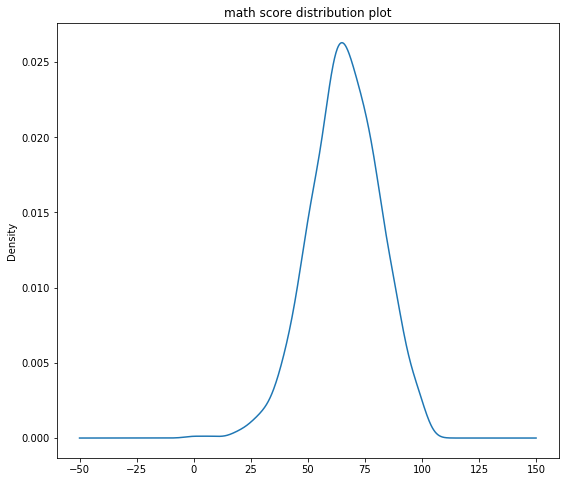

In [94]:
original['math score'].plot(kind='kde',title='math score distribution plot',figsize=(9,8))

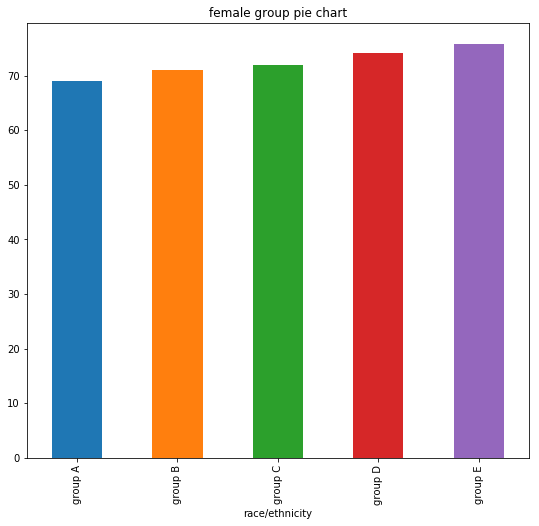

In [95]:
groupPivot['female'].plot(kind='bar',title='female group pie chart',figsize=(9,8))